<a href="https://colab.research.google.com/github/BellaDir/Astro-Data/blob/main/Gravitational_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy # Installs the Python gravitational wave package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99222 sha256=85d17b83059c60aaac9339d44e2264b24744877d36e0eacb7af0b835244276d8
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [2]:
t0 = 1126259462.4    # Stores the GPS timestamp for gravitational wave event GW150914
from gwpy.timeseries import TimeSeries # Imports the time series from the gwpy
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478) # Opens the gravitational wave data from the H1 detector

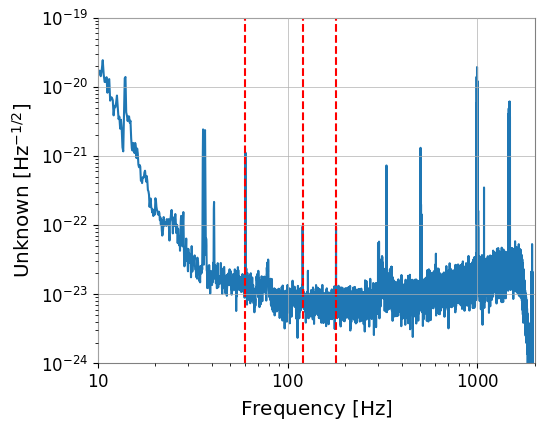

In [3]:
import matplotlib.pyplot as plt # Imports plotting materials

# Computes then plots the Amplitude Spectral Density (ASD) of the time series data
fig2 = hdata.asd(fftlength=8).plot()
plt.xlim(10,2000)
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")

In [4]:
from gwpy.signal import filter_design # Imports the filter design part of the gwpy data
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # Creates a bandpass filter that passes frequencies between 50 Hz and 250 Hz

notches = [filter_design.notch(line, hdata.sample_rate) for # Creates a notch filter that removes specific components at 60 Hz, 120 Hz, and 180 Hz
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches) # Combines the filters

hfilt = hdata.filter(zpk, filtfilt=True) # Applies the filter to the data

In [5]:
# Crops the time series data
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

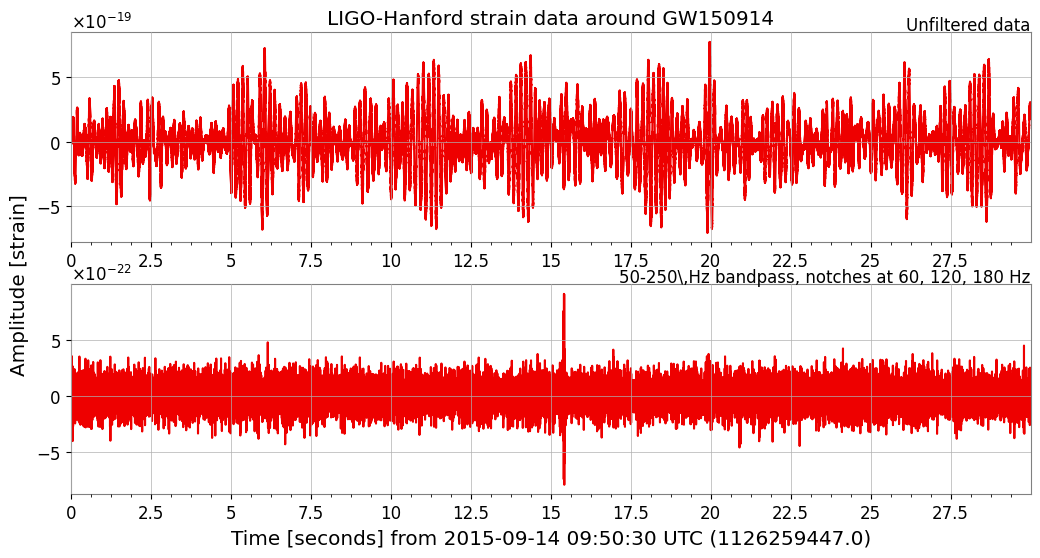

In [6]:
from gwpy.plot import Plot # Imports plots from the gwpy
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True, # Creates a plot comparing the unfiltered and filtered data
            color='gwpy:ligo-hanford')

# Further plot customizations
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW150914')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

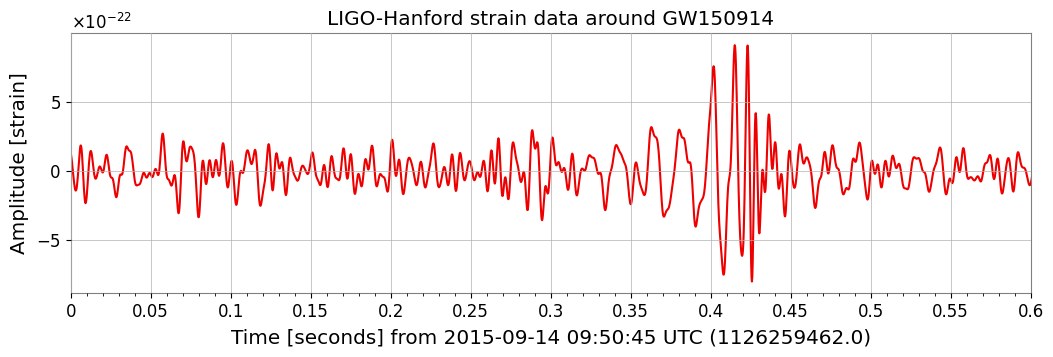

In [7]:
import matplotlib.pyplot as plt # Imports the plotting materials

plot = hfilt.plot(color='gwpy:ligo-hanford') # Creates a plot of the filtered data

# Further plot customizations
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW150914')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(1126259462, 1126259462.6)
ax.set_xscale('seconds', epoch=1126259462)
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()